Q-learning training stage


Training finished.



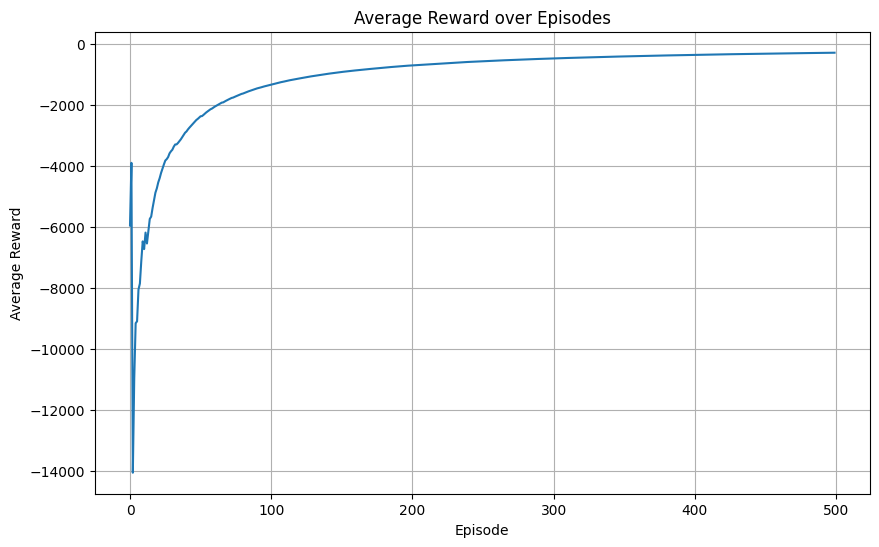

In [17]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Initialize the Taxi-v3 environment
env = gym.make('Taxi-v3', render_mode='ansi').env

# Parameters
alpha = 0.9  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration factor (start with high exploration)
epsilon_decay = 0.995  # Decay factor for epsilon
epsilon_min = 0.01  # Minimum epsilon value
num_episodes = 500  # Number of episodes for training

# Initialize the Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Lists to store rewards and average rewards
all_rewards = []
average_rewards = []

# Q-learning algorithm
for i in range(num_episodes):
    state = env.reset()  # Reset the environment for a new episode
    done = False
    total_reward = 0  # Initialize total reward for this episode

    while not done:
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: select a random action
        else:
            action = np.argmax(q_table[state])  # Exploit: select the action with max value (greedy)

        # Take the action and observe the outcome
        next_state, reward, done, info = env.step(action)
        total_reward += reward  # Accumulate reward

        # Update Q-value for the current state-action pair
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Compute the new Q-value
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Transition to the next state
        state = next_state

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Store total reward and calculate average reward
    all_rewards.append(total_reward)
    average_reward = np.mean(all_rewards)
    average_rewards.append(average_reward)

# Output the learned Q-table
print("Training finished.\n")

# Plot the average reward over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), average_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward over Episodes')
plt.grid(True)
plt.show()

Q-learning test stage

In [19]:
import time

total_epochs, total_penalties, total_rewards = 0, 0, 0
episodes = 5  # Number of episodes for testing
counter = 0

for ep in range(episodes):
    if(counter > 100):
      print("System time out")
      break
    state = env.reset()
    epochs, penalties, episode_reward = 0, 0, 0
    done = False


    print(f"Episode {ep+1}\n")
    while not done:
        # Render the environment
        clear_output(wait=True)
        p = env.render()
        print(p[0])
        time.sleep(1)  # Add delay for better visualization

        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        episode_reward += reward
        epochs += 1
        counter += 1
        if(counter > 100):
          break

    total_penalties += penalties
    total_epochs += epochs
    total_rewards += episode_reward

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average reward per episode: {total_rewards / episodes}")

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Results after 5 episodes:
Average timesteps per episode: 11.8
Average penalties per episode: 0.0
Average reward per episode: 9.2


# **DQN (Deep Q-Network)**
training stage

In [ ]:
pip install gymnasium stable_baselines3

Streaming output truncated to the last 5000 lines.
|    loss             | 0.0105   |
|    n_updates        | 60007    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 2.64     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2036     |
|    fps              | 233      |
|    time_elapsed     | 259      |
|    total_timesteps  | 60573    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.00689  |
|    n_updates        | 60072    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 2.43     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 2040     |
|    fps              | 233      |
|    time_elapsed     | 260      |
|   

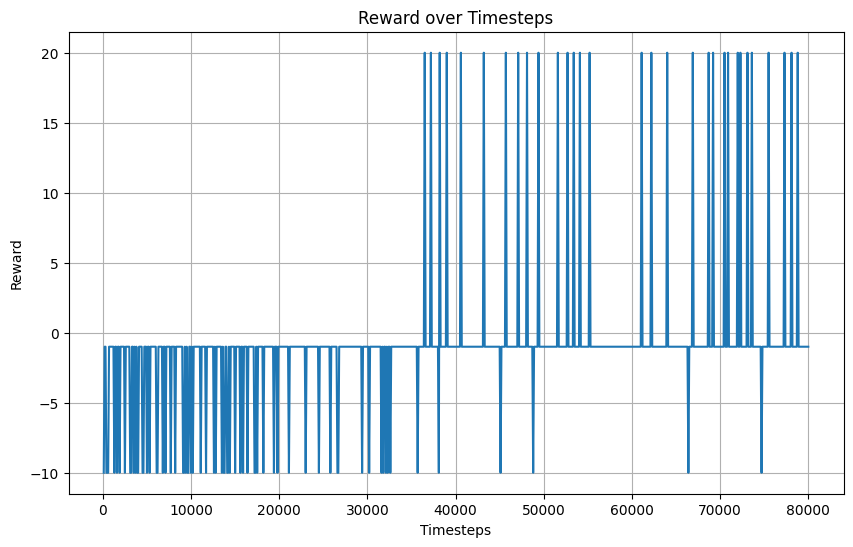

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy
from IPython.display import clear_output


class RewardCallback(BaseCallback):
    def __init__(self, check_freq: int, verbose=1):
        super(RewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.rewards = []
        self.timesteps = []

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            # Retrieve reward
            reward = self.locals['rewards'][-1]
            self.rewards.append(reward)
            self.timesteps.append(self.num_timesteps)
        return True

    def plot_rewards(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.timesteps, self.rewards)
        plt.xlabel('Timesteps')
        plt.ylabel('Reward')
        plt.title('Reward over Timesteps')
        plt.grid(True)
        plt.show()


# Set up environment
environment = gym.make("Taxi-v3", render_mode="rgb_array")

# Initialize model
model = DQN(
    "MlpPolicy",
    environment,
    gamma = 0.9,
    learning_rate=1e-3,
    learning_starts=500,
    target_update_interval=100,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.1,
    batch_size=32,
    train_freq=1,
    gradient_steps=1,
    exploration_fraction=0.5,
    verbose=1
)

# Create and pass the callback
reward_callback = RewardCallback(check_freq=100)
model.learn(total_timesteps=80000, log_interval=4, callback=reward_callback)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, environment, n_eval_episodes=100)
print(f"Mean Reward over 100 episodes: {mean_reward}")
print(f"Standard Deviation of Reward: {std_reward}")

# Plot the reward over timesteps
reward_callback.plot_rewards()

DQN testing stage

In [ ]:
import time


# Initialize total metrics
total_epochs, total_penalties, total_rewards = 0, 0, 0
episodes = 5  # Number of episodes for testing
counter = 0

# Set up the Taxi-v3 environment
env = gym.make('Taxi-v3', render_mode='ansi').env


for ep in range(episodes):
    if counter > 200:
        print("System time out")
        break

    # Reset environment at the beginning of each episode
    state, _ = env.reset()  # Extract the state from the tuple
    epochs, penalties, episode_reward = 0, 0, 0
    done = False

    print(f"Episode {ep+1}\n")
    while not done:
        # Render the environment
        clear_output(wait=True)
        p = env.render()
        print(p)
        time.sleep(1)  # Add delay for better visualization

        # Predict the next action
        action, _states = model.predict(state, deterministic=True)
        state, reward, terminated, truncated, info = env.step(int(action))

        if reward == -10:
            penalties += 1

        episode_reward += reward
        epochs += 1
        counter += 1

        if terminated or truncated:
          state, info = env.reset()
          break

        if counter > 200:
            break

    total_penalties += penalties
    total_epochs += epochs
    total_rewards += episode_reward

# Print results after all episodes
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average reward per episode: {total_rewards / episodes}")

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Results after 5 episodes:
Average timesteps per episode: 13.8
Average penalties per episode: 0.0
Average reward per episode: 7.2


# **SARSA (State-Action-Reward-State-Action)**
Training stage

Training finished.



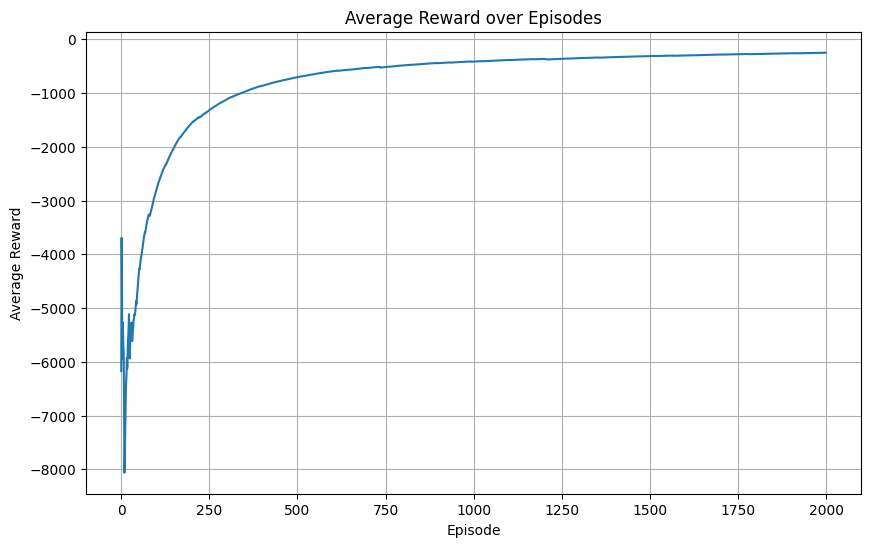

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Initialize the Taxi-v3 environment
env = gym.make('Taxi-v3', render_mode='ansi').env

# Parameters
alpha = 0.2  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration factor (start with high exploration)
epsilon_decay = 0.995  # Decay factor for epsilon
epsilon_min = 0.01  # Minimum epsilon value
num_episodes = 2000  # Number of episodes for training

# Initialize the Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Lists to store rewards and average rewards
all_rewards = []
average_rewards = []

# SARSA algorithm
for i in range(num_episodes):
    state = env.reset()  # Reset the environment for a new episode
    done = False
    total_reward = 0  # Initialize total reward for this episode

    # Initial action selection based on epsilon-greedy policy
    action = env.action_space.sample() if random.uniform(0, 1) < epsilon else np.argmax(q_table[state])

    while not done:
        # Take the action and observe the outcome
        next_state, reward, done, info = env.step(action)
        total_reward += reward  # Accumulate reward

        # Select next action based on epsilon-greedy policy
        next_action = env.action_space.sample() if random.uniform(0, 1) < epsilon else np.argmax(q_table[next_state])

        # Update Q-value for the current state-action pair using SARSA update rule
        old_value = q_table[state, action]
        next_value = q_table[next_state, next_action]
        q_table[state, action] = old_value + alpha * (reward + gamma * next_value - old_value)

        # Transition to the next state and action
        state, action = next_state, next_action

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Store total reward and calculate average reward
    all_rewards.append(total_reward)
    average_reward = np.mean(all_rewards)
    average_rewards.append(average_reward)

# Output the learned Q-table
print("Training finished.\n")

# Plot the average reward over episodes
plt.figure(figsize=(10, 6))
plt.plot(range(num_episodes), average_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward over Episodes')
plt.grid(True)
plt.show()

SARSA testing stage

In [ ]:
import time

total_epochs, total_penalties, total_rewards = 0, 0, 0
episodes = 5  # Number of episodes for testing
counter = 0

for ep in range(episodes):
    if(counter > 100):
      print("System timed out")
      break
    state = env.reset()
    epochs, penalties, episode_reward = 0, 0, 0
    done = False

    print(f"Episode {ep+1}\n")
    while not done:
        # Render the environment
        clear_output(wait=True)
        p = env.render()
        print(p[0])
        time.sleep(1)  # Add delay for better visualization

        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        episode_reward += reward
        epochs += 1
        counter += 1
        if(counter > 100):
          break

    total_penalties += penalties
    total_epochs += epochs
    total_rewards += episode_reward

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print(f"Average reward per episode: {total_rewards / episodes}")

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Results after 5 episodes:
Average timesteps per episode: 12.2
Average penalties per episode: 0.0
Average reward per episode: 8.8
